# Gaussian Target Practice

In [1]:
] activate "../"

  Activating project at `~/PhD/MicroCanonicalHMC.jl`


In [2]:
using Distributions
using ForwardDiff
using LinearAlgebra
using Random

using PyPlot
using Distributed

using Revise
using MicroCanonicalHMC

## MCHMC

In [3]:
d = 50
k = 5
m = Vector(LinRange(1, 100, d))
e = 10 .^ LinRange(log10(1/sqrt(k)), log10(sqrt(k)), d)
cov_matt = Diagonal(e);

In [4]:
target = GaussianTarget(m, cov_matt);

In [5]:
spl = MCHMC(50_000, 0.0001; gamma=(50-1)/(50+1), init_eps=sqrt(d)) #, sigma=ones(d));
@time samples_mchmc = Sample(spl, target, 100_000; dialog=true);

[ Info: Tuning sigma ⏳
[ Info: Tuning eps ⏳
[ Info: Tuning L ⏳
MCHMC (tuning):   0%|                                   |  ETA: 3:10:48

Burn in step: 10000
eps --->0.006945556611818148


MCHMC (tuning):  20%|███████                            |  ETA: 0:00:25

L   --->0.01770108558940667
 


MCHMC (tuning):  40%|██████████████                     |  ETA: 0:00:27

Burn in step: 20000
eps --->0.003465920028633518
L   --->0.02021230281333347
 


MCHMC (tuning):  60%|█████████████████████              |  ETA: 0:00:24

Burn in step: 30000
eps --->0.0030281250875465273
L   --->0.032549802487159815
 


MCHMC (tuning):  80%|████████████████████████████       |  ETA: 0:00:15

Burn in step: 40000
eps --->0.3424974725532987
L   --->6.57960838495163
 


2mMCHMC (tuning): 100%|███████████████████████████████████| Time: 0:01:28

Burn in step: 50000
eps --->0.18895982892163476
L   --->4.0874164826207515
 


[ Info: eps: 0.18895982892163476
[ Info: L: 4.0874164826207515
[ Info: nu: 0.03438593350202867
[ Info: sigma: [0.3596528136353334, 1.2932204426458935, 1.7071046287766705, 2.0073441610865115, 2.466153163647941, 3.6491773066676916, 3.8373262575536753, 4.612642421084676, 5.380304662131314, 6.548271072887437, 6.3259268175109185, 7.47857510834492, 7.974518067489247, 8.530571230157719, 10.265841480365617, 10.066207231628793, 10.595520525943535, 11.54586817388136, 12.57083144019046, 12.758868948944235, 14.190194531088805, 15.022624257524537, 15.500251712000855, 15.468160285791319, 17.32737698576559, 17.885519099392333, 19.01289030901043, 19.607326688518263, 20.452367070266057, 21.707172779530033, 22.146068356493817, 22.182136064759973, 23.941247322918937, 24.710477930493656, 25.368696739333316, 26.216010388357105, 27.490562777243323, 28.13900738671231, 29.00242341484498, 30.39296050471153, 30.60752971615418, 32.02832684392456, 32.834759938881035, 33.32252542879384, 34.503071487914795, 35.2767

 96.167729 seconds (45.03 M allocations: 486.754 GiB, 12.47% gc time, 4.73% compilation time: 2% of which was recompilation)


In [6]:
_samples_mchmc = mapreduce(permutedims, vcat, samples_mchmc[10_000:end])
stds = std(_samples_mchmc, dims=1)[1:end-3]
means = mean(_samples_mchmc, dims=1)[1:end-3]
E = [sample[end-1] for sample in samples_mchmc][10_000:end];
eps = [sample[end-2] for sample in samples_mchmc]#[10_000:end]
VarE = mean(E.^2)/d

0.00026564797696961245

In [7]:
ESSs, rhat = Summarize(samples_mchmc[10_000:end])
ESS = mean(ESSs)

21003.24057123409

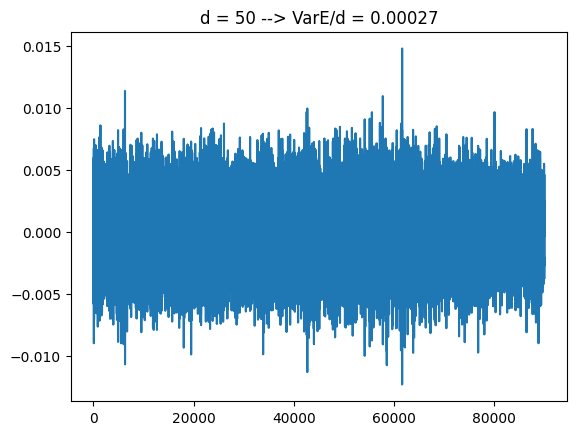

PyObject Text(0.5, 1.0, 'd = 50 --> VarE/d = 0.00027')

In [8]:
plt.plot(E/d, label="E/d")
plt.title(string("d = ", d, " --> VarE/d = ", round(VarE, digits=5)))

In [9]:
spl = MCHMC(50_000, 0.0001; init_eps=sqrt(d), adaptive=true) #, sigma=ones(d))
@time samples_mchmc_adaptive = Sample(spl, target, 100_000; dialog=true);

[ Info: Tuning sigma ⏳
[ Info: Tuning eps ⏳
[ Info: Tuning L ⏳
MCHMC (tuning):  20%|███████                            |  ETA: 0:00:08

Burn in step: 10000
eps --->0.006961635075721327
L   --->0.017778743381375035
 


MCHMC (tuning):  40%|██████████████                     |  ETA: 0:00:11

Burn in step: 20000
eps --->0.0034787706182133277
L   --->0.02033443592328845
 


MCHMC (tuning):  60%|█████████████████████              |  ETA: 0:00:11

Burn in step: 30000
eps --->0.0030311397566428143
L   --->0.03268279807586169
 


MCHMC (tuning):  80%|████████████████████████████       |  ETA: 0:00:07

Burn in step: 40000
eps --->0.3533639156314745
L   --->6.79205030071755
 


2mMCHMC (tuning): 100%|███████████████████████████████████| Time: 0:00:46

Burn in step: 50000
eps --->0.20411871258313027
L   --->4.412061719786083
 


[ Info: eps: 0.20411871258313027
[ Info: L: 4.412061719786083
[ Info: nu: 0.03519893163159654
[ Info: sigma: [0.10238870575703908, 0.7850963188008879, 1.0551886713915117, 2.080749266472106, 2.3334002517266144, 3.4949050351822946, 4.249481055642619, 4.57394834492223, 5.593751215887238, 5.929379015482555, 6.572753166639736, 7.2615846646279305, 8.063413097167373, 8.67565237752492, 9.159045272822695, 10.60892898100794, 10.269638526965641, 11.59126964448017, 12.452947981960673, 13.342286753182028, 14.251133124281361, 14.358489814441047, 15.600547562239612, 16.50645044518269, 17.287437743009583, 17.68852279501278, 18.40992668571272, 19.74008999074121, 20.049462906956496, 21.71850874962527, 22.78393724351237, 22.99735450895721, 24.065189464124014, 24.821896017631417, 24.854284049090413, 26.298883021672136, 26.5915213880449, 28.189307537423574, 29.1543849282842, 29.426370518846905, 30.857453251785156, 31.004449510607593, 32.4186249400852, 33.812463444946715, 34.64104205861055, 35.9621354085443

 50.502563 seconds (34.62 M allocations: 485.954 GiB, 15.31% gc time, 0.00% compilation time)


In [10]:
_samples_mchmc_adaptive = mapreduce(permutedims, vcat, samples_mchmc_adaptive[10_000:end])
stds_adaptive = std(_samples_mchmc_adaptive, dims=1)[1:end-3]
means_adaptive = mean(_samples_mchmc_adaptive, dims=1)[1:end-3]
E_adaptive = [sample[end-1] for sample in samples_mchmc_adaptive]#[10_000:end];
eps_adaptive = [sample[end-2] for sample in samples_mchmc_adaptive]#[10_000:end]
VarE_adaptive = mean(E_adaptive.^2)/d

0.00010097411406481568

In [11]:
ESSs, rhat = Summarize(samples_mchmc_adaptive[10_000:end])
ESS = mean(ESSs)

17324.533252933412

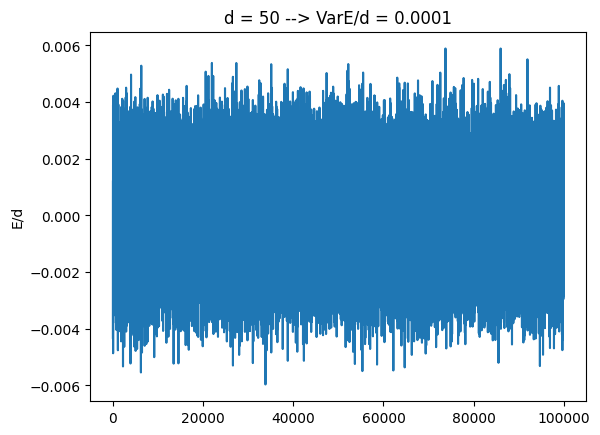

PyObject Text(0.5, 1.0, 'd = 50 --> VarE/d = 0.0001')

In [12]:
plt.plot(E_adaptive/d, label="E/d")
plt.ylabel("E/d")
plt.title(string("d = ", d, " --> VarE/d = ", round(VarE_adaptive, digits=5)))

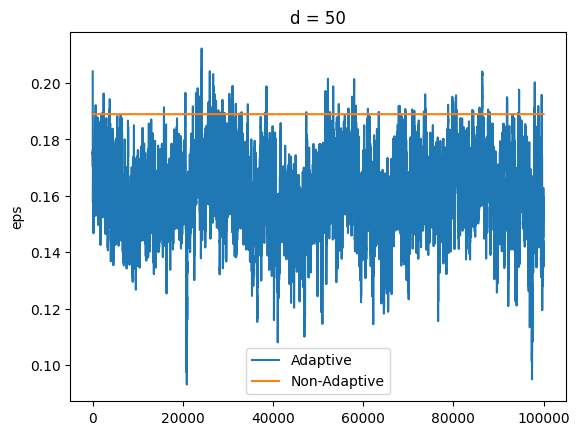

PyObject Text(0.5, 1.0, 'd = 50')

In [13]:
plt.plot(eps_adaptive, label="Adaptive")
plt.plot(eps, label="Non-Adaptive")
plt.ylabel("eps")
plt.legend()
plt.title(string("d = ", d))

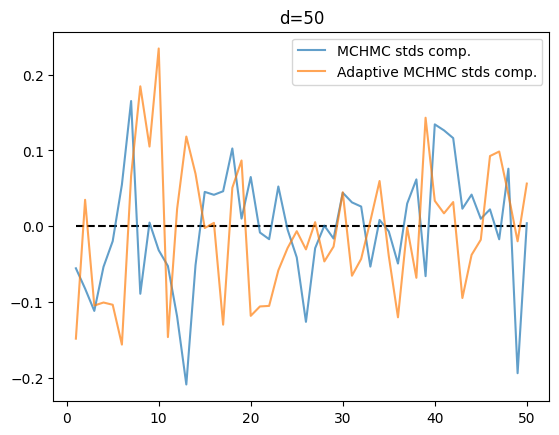

In [14]:
plt.plot(Vector(1:d), zeros(d), "k--")
plt.plot(Vector(1:d), stds./sqrt.(e) .- 1, label="MCHMC stds comp.", alpha=0.7)
plt.plot(Vector(1:d), stds_adaptive./sqrt.(e) .- 1, label="Adaptive MCHMC stds comp.", alpha=0.7)
plt.legend()
plt.title(string("d=", d));

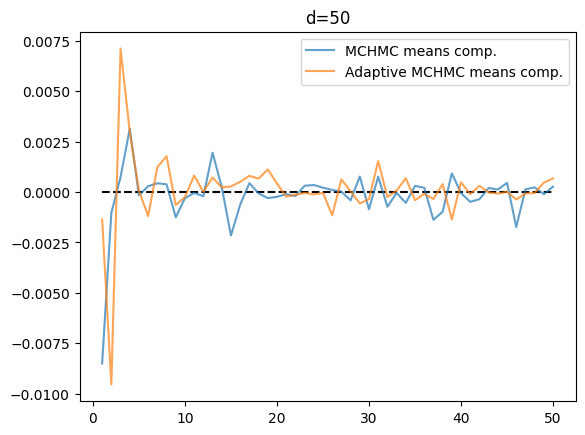

In [15]:
plt.plot(Vector(1:d), zeros(d), "k--")
plt.plot(Vector(1:d), (means .- m)./sqrt.(e), label="MCHMC means comp.", alpha=0.7)
plt.plot(Vector(1:d), (means_adaptive .- m)./sqrt.(e), label="Adaptive MCHMC means comp.", alpha=0.7)
plt.legend()
plt.title(string("d=", d));

## NUTS

In [16]:
using AdvancedHMC
using LogDensityProblems

In [17]:
# Define the target distribution using the `LogDensityProblem` interface
struct LogTargetDensity
    dim::Int
end
LogDensityProblems.logdensity(p::LogTargetDensity, θ) = -target.nlogp(θ) #-sum(abs2, θ) / 2  # standard multivariate normal
LogDensityProblems.dimension(p::LogTargetDensity) = p.dim
LogDensityProblems.capabilities(::Type{LogTargetDensity}) = LogDensityProblems.LogDensityOrder{0}()

In [18]:
# Choose parameter dimensionality and initial parameter value
initial_θ = target.prior_draw()
ℓπ = LogTargetDensity(d)

# Set the number of samples to draw and warmup iterations
n_samples, n_adapts = 50_000, 10_000

# Define a Hamiltonian system
metric = DiagEuclideanMetric(d)
hamiltonian = Hamiltonian(metric, ℓπ, ForwardDiff)

# Define a leapfrog solver, with initial step size chosen heuristically
initial_ϵ = find_good_stepsize(hamiltonian, initial_θ)
integrator = AdvancedHMC.Leapfrog(initial_ϵ)

# Define an HMC sampler, with the following components
#   - multinomial sampling scheme,
#   - generalised No-U-Turn criteria, and
#   - windowed adaption for step-size and diagonal mass matrix
proposal = NUTS{MultinomialTS, GeneralisedNoUTurn}(integrator)
adaptor = StanHMCAdaptor(MassMatrixAdaptor(metric), StepSizeAdaptor(0.8, integrator))

# Run the sampler to draw samples from the specified Gaussian, where
#   - `samples` will store the samples
#   - `stats` will store diagnostic statistics for each sample
samples_hmc, stats = sample(hamiltonian, proposal, initial_θ, n_samples, adaptor, n_adapts; progress=true);

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter ~/.julia/packages/ProgressMeter/sN2xr/src/ProgressMeter.jl:618
Sampling 100%|███████████████████████████████| Time: 0:00:07
  iterations:                    50000
  n_steps:                       7
  is_accept:                     true
  acceptance_rate:               0.9615467229852597
  log_density:                   -72.24727249694541
  hamiltonian_energy:            98.48168843704593
  hamiltonian_energy_error:      -0.13805798964202154
  max_hamiltonian_energy_error:  -0.37369445782937305
  tree_depth:                    3
  numerical_error:               false
  step_size:                     0.476955859053797
  nom_step_size:                 0.47695585

In [19]:
_samples_hmc = mapreduce(permutedims, vcat, samples_hmc)
stds_hmc = vec(std(_samples_hmc, dims=1))
means_hmc = vec(mean(_samples_hmc, dims=1));

In [20]:
ESSs, rhat = Summarize(samples_hmc)
ESS = mean(ESSs)

63722.11180405913

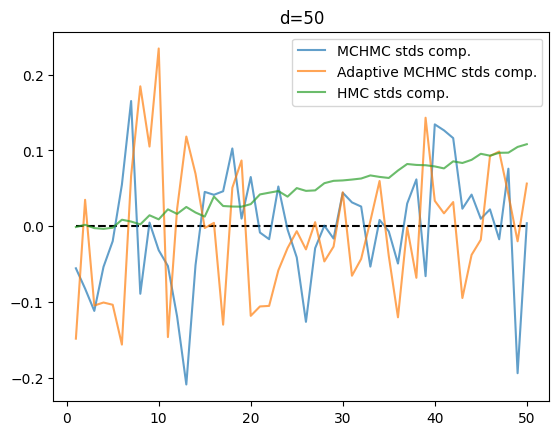

In [21]:
plt.plot(Vector(1:d), zeros(d), "k--")
plt.plot(Vector(1:d), stds./sqrt.(e) .- 1, label="MCHMC stds comp.", alpha=0.7)
plt.plot(Vector(1:d), stds_adaptive./sqrt.(e) .- 1, label="Adaptive MCHMC stds comp.", alpha=0.7)
plt.plot(Vector(1:d), stds_hmc./sqrt.(e) .- 1, label="HMC stds comp.", alpha=0.7)
plt.legend()
plt.title(string("d=", d));

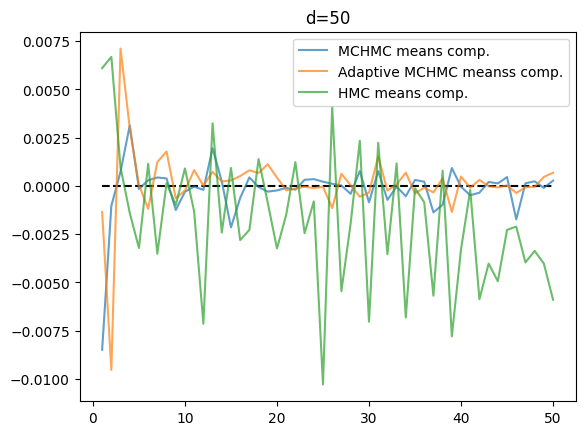

In [22]:
plt.plot(Vector(1:d), zeros(d), "k--")
plt.plot(Vector(1:d), (means .- m) ./ sqrt.(e), label="MCHMC means comp.", alpha=0.7)
plt.plot(Vector(1:d), (means_adaptive.- m) ./ sqrt.(e), label="Adaptive MCHMC meanss comp.", alpha=0.7)
plt.plot(Vector(1:d), (means_hmc.- m) ./ sqrt.(e), label="HMC means comp.", alpha=0.7)
plt.legend()
plt.title(string("d=", d));